# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:grey">  Numerical Exercises 2</span>

## <span style="color:red"> Introduction </span>

In this exercise we study **MC integration** and an example of a **Markov process**.

- In *Exercise 02.1* we calculate a definite integral by applying the **importance sampling** method
- In *Exercise 02.2* we simulate a **random walk** on a cubic lattice and in the continuum

Below there is a list of the packages that will be used during this notebook:

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

## <span style="color:red"> Exercise 02.1 </span>

In this excercise we want to compute the following 1D integral:
    $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
We can rewrite this integral in the form
$$I = \int_\Omega g(x)p(x)\, dx$$

where $p(x)$ is the probability distribution function (pdf), which satisfies $p(x) \geq 0 \,\,\, \forall x \in \Omega$ and $\int_\Omega p(x)\, dx = 1$.

  - 1) We proceed by sampling a uniform distribution $\left(p(x) = 1 \,\, \forall x\right)$ in  $[0\, , 1]$.
  Within the file <font face = "Courier"> `es02.1.cpp` </font> we use the <font face = "Courier"> `Uniform` </font> method of the <font face = "Courier"> `Integral` </font> class.
  

  - 2) We apply the importance sampling method, rewriting the previous integral as
  
  $$I = \int_\Omega \left[\frac{g(x)p(x)}{d(x)}\right]d(x)\, dx$$
  
  We therefore introduce a different probability distribution $d(x)$, such that $d(x) \geq 0 \,\,\, \forall x \in \Omega$ and $\int_\Omega d(x)\, dx = 1$.
Importance sampling consists of choosing the pdf $p(x)$ as close as possible to the integrand $g(x)$. We 
expect that “similar” functions will reduce the variance.


To carry out point 2), we choose $p(x) = 2 - 2x$ so that:

$$I = \int_\Omega \left[\frac{g(x)p(x)}{d(x)}\right]d(x)\, dx = \int_0^1 \left[\frac{\frac{\pi}{2}\cos\left(\frac{\pi}{2}x\right)}{2-2x}\right]\left(2-2x\right)\, dx$$

We then invert the cumulative function $F_x$ to extract random numbers according to the new probability distribution, using the <font face = "Courier"> `Coseno` </font> method of the <font face = "Courier"> `Random` </font> class:
$$F_x = y = \int_0^x p(x) \, dx = 2x - x^2$$
where $y$ is a uniform random number in $[0\, , 1]$. By reversing the equation:
$$x = 1 \pm \sqrt{1 - y}$$

Since we are interested in extracting random values of x within the domain of integration, we choose the solution with the minus sign.

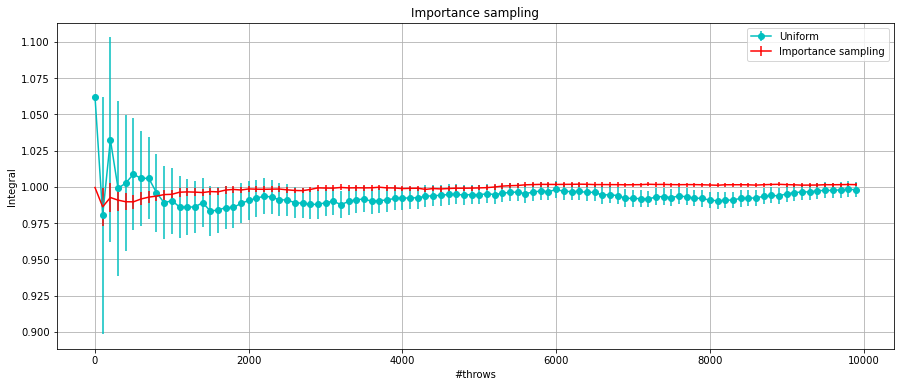

1) Final estimation:  I = 0.997939 +- 0.00528403
2) Final estimation:  I = 1.00152 +- 0.00126995


In [19]:
plt.figure(figsize=(15,6))
plt.title('Importance sampling')
x, sum_prog, err_prog = np.loadtxt("./Risultati/es01.1a.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.errorbar(x,sum_prog,yerr=err_prog, marker='o', color='c', label='Uniform')
plt.xlabel('#throws')
plt.ylabel('Integral')
plt.grid(True)

y, sum_prog2, err_prog2 = np.loadtxt("./Risultati/es01.1b.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.errorbar(y,sum_prog2,yerr=err_prog2, color = 'red', label='Importance sampling')
plt.xlabel('#throws')
plt.ylabel('Integral')
plt.grid(True)
plt.legend()
plt.show()
print('1) Final estimation:  I = ' + str(sum_prog[-1]) + ' +- ' + str(err_prog[-1]))
print('2) Final estimation:  I = ' + str(sum_prog2[-1]) + ' +- ' + str(err_prog2[-1]))

We observe that the importance sampling method provides faster convergence and lower variance.

## <span style="color:red"> Exercise 02.2 </span>

In this exercise we simulate a 3D random walk thanks to the methods of the <font face = "Courier"> `RandomWalk` </font> class contained in the <font face = "Courier"> `RandomWalk.cpp` </font> file.

We first simulate the discrete case on a cubic lattice with lattice constant $a=1$:

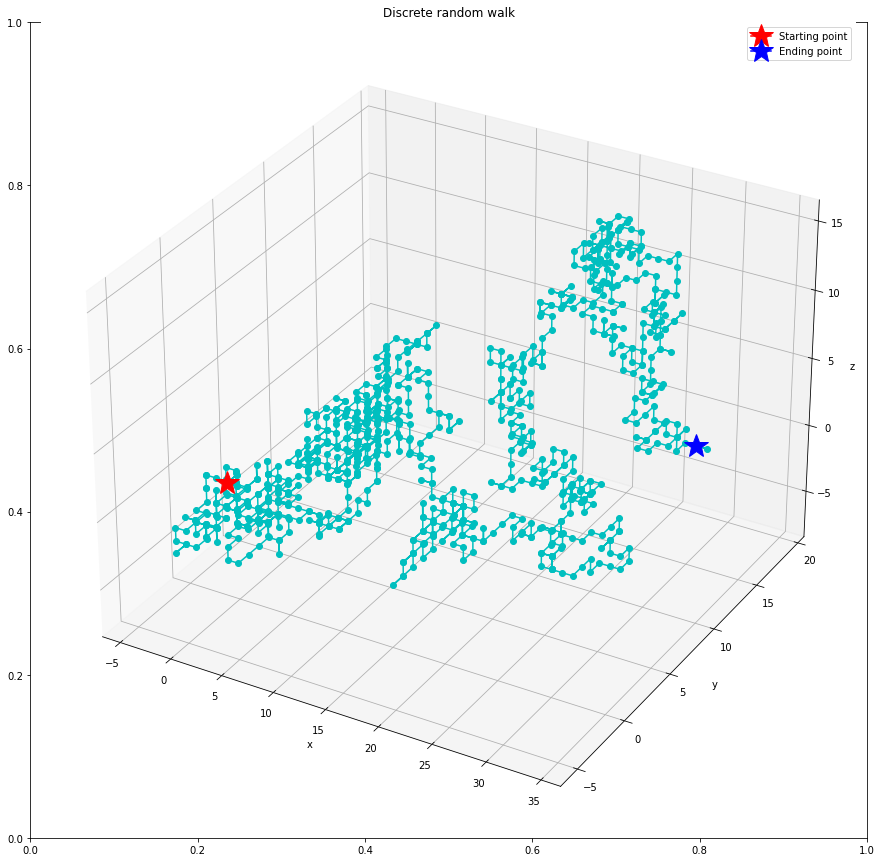

In [37]:
x, y, z = np.loadtxt("./Risultati/RWdiscreto.dat", usecols=(1,2,3), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(15,15))
plt.title('Discrete random walk')
axes = plt.axes(projection='3d')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
line=axes.plot3D(x,y,z,color='c', marker = 'o')
axes.plot3D(x[0],y[0],z[0],color='red', marker = '*', markersize=25, label='Starting point')
axes.plot3D(x[-1],y[-1],z[-1],color='blue', marker = '*', markersize=25, label='Ending point')
plt.legend()

Then, we simulate the random walk in the continuum; at each discrete time the walker makes a step of length equal to $a=1$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$.

We perform these uniform samplings thanks to the <font face = "Courier"> `RanTheta()` </font> and <font face = "Courier"> `RanPhi()` </font> methods of the <font face = "Courier"> `Random` </font> class contained in <font face = "Courier"> `random.cpp` </font>.

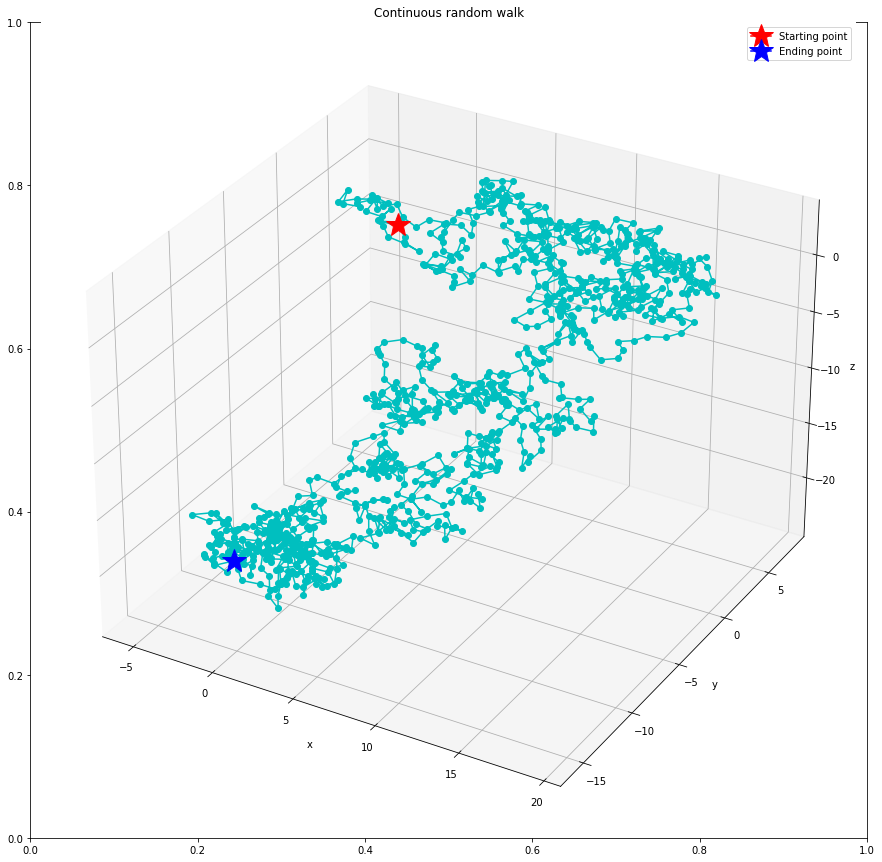

In [69]:
x2, y2, z2 = np.loadtxt("./Risultati/RWcontinuo.dat", usecols=(1,2,3), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(15,15))
plt.title('Continuous random walk')
axes = plt.axes(projection='3d')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
line=axes.plot3D(x2,y2,z2,color='c', marker = 'o')
axes.plot3D(x2[0],y2[0],z2[0],color='red', marker = '*', markersize=25, label='Starting point')
axes.plot3D(x2[-1],y2[-1],z2[-1],color='blue', marker = '*', markersize=25, label='Ending point')
plt.legend()

We show a piture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and we observe that both the walkers, discrete and continuos, have a diffusive behaviour. In fact, we can fit both results with a function like $f(N)=k\sqrt{N}$, where $N$ is the number of RW steps. Errors are so small that they are not visible graphically.

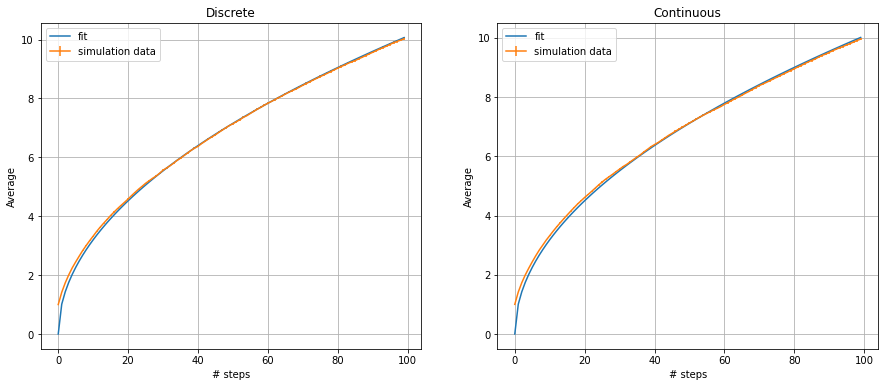

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

def f(x,k):
    return k * np.sqrt(x)

x = np.arange(100)

i_d, media_d, err_d = np.loadtxt("./Risultati/es02.2a.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
i_c, media_c, err_c = np.loadtxt("./Risultati/es02.2b.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt1, p_cov1 = curve_fit(f,x,media_d)
y_fit1 = f(x,p_opt1)

p_opt2, p_cov2 = curve_fit(f,x,media_c)
y_fit2 = f(x,p_opt2)


plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(x,y_fit1, label='fit') 
plt.title(r"Discrete")
plt.errorbar(i_d,media_d,yerr=err_d,label='simulation data')
plt.xlabel('# steps')
plt.ylabel('Average')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,y_fit2,label='fit') 
plt.title(r"Continuous")
plt.errorbar(i_c,media_c,yerr=err_c,label='simulation data')
plt.xlabel('# steps')
plt.ylabel('Average')
plt.grid(True)
plt.legend()
plt.show()